In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import os


In [11]:
print(os.getcwd())
df = pd.read_csv('../data/appartements_data_db.csv')
df.head()


/mnt/c/Windows/system32/appartement-pricing-ml/notebooks


,title,price,city_name,salon,nb_rooms,nb_baths,surface_area,equipment,link
0,CMN-MA-1752 - Appartement à vendre à Palmier,2 000 000 DH,Casablanca,NaN,2.0,2.0,168.0,Ascenseur/Balcon/Parking/Terrasse,https://www.avito.ma/fr/palmier/appartements/C...
1,66370-Vente Appt à Casablanca Hay Hassani de 1...,1 195 000 DH,Casablanca,NaN,2.0,2.0,98.0,Ascenseur/Balcon/Chauffage/Climatisation/Cuisi...,https://www.avito.ma/fr/hay_hassani/appartemen...
2,Appartement à vendre 81 m² à Dar Bouazza,1 350 000 DH,Dar Bouazza,1.0,2.0,2.0,81.0,Ascenseur/Balcon/Chauffage/Climatisation/Conci...,https://www.avito.ma/fr/dar_bouazza/appartemen...
3,63860-Vente Appt à Casablanca Quartier Bd Med ...,900 000 DH,Casablanca,NaN,1.0,1.0,56.0,Ascenseur/Chauffage/Climatisation/Cuisine Équi...,https://www.avito.ma/fr/centre_ville/apparteme...
4,Appartement à Rabat Agdal,3 100 000 DH,Rabat,2.0,3.0,2.0,200.0,Ascenseur/Balcon/Concierge/Parking/Sécurité,https://www.avito.ma/fr/agdal/appartements/App...


In [12]:
df.shape

(1773, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1772 non-null   object 
 1   price         1490 non-null   object 
 2   city_name     1772 non-null   object 
 3   salon         1620 non-null   float64
 4   nb_rooms      1490 non-null   float64
 5   nb_baths      1480 non-null   float64
 6   surface_area  1742 non-null   float64
 7   equipment     1402 non-null   object 
 8   link          1773 non-null   object 
dtypes: float64(4), object(5)
memory usage: 124.8+ KB


In [14]:
df.describe(include='all')
df.isnull().sum()

title             1
price           283
city_name         1
salon           153
nb_rooms        283
nb_baths        293
surface_area     31
equipment       371
link              0
dtype: int64

In [15]:
df.duplicated().sum()

41

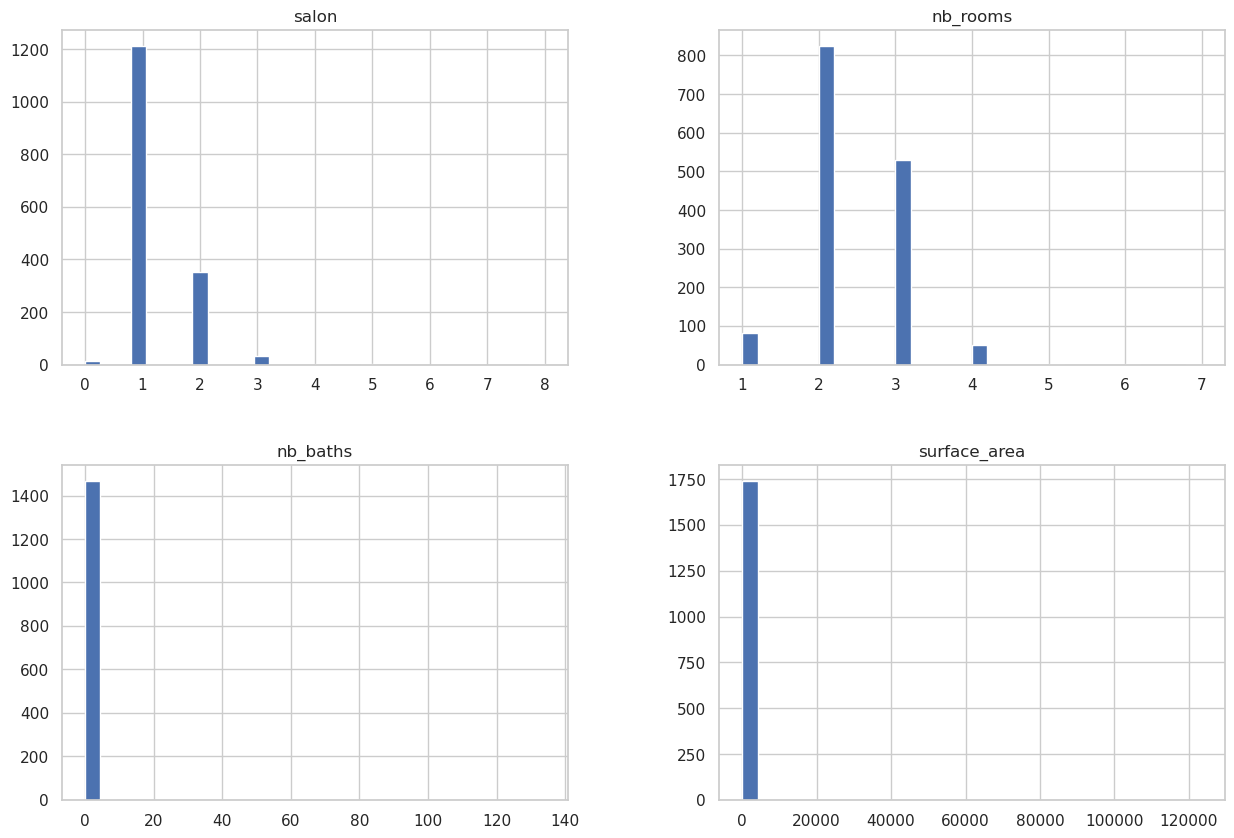


title:
title
appartement à vendre                                  33
appartement a vendre                                  17
Appartement à vendre                                  13
appartement                                           12
Appartement                                            8
                                                      ..
Appart route de Casablanca à vendre                    1
Apt/Investissement-Habitation/CaféWaw FarahEssalem     1
A Belvédère, Lumineux 112m², sans vis à vis            1
Apt 3Chambres 2S Résidence sécurisée/Busway Oulfa      1
Appartement à vendre 12000 m² à Temara                 1
Name: count, Length: 1471, dtype: int64

price:
price
850 000 DH      34
1 200 000 DH    28
900 000 DH      27
700 000 DH      27
1 500 000 DH    26
                ..
160 000 DH       1
1 356 000 DH     1
2 680 000 DH     1
585 000 DH       1
3 500 DH         1
Name: count, Length: 355, dtype: int64

city_name:
city_name
Casablanca                626
Marra

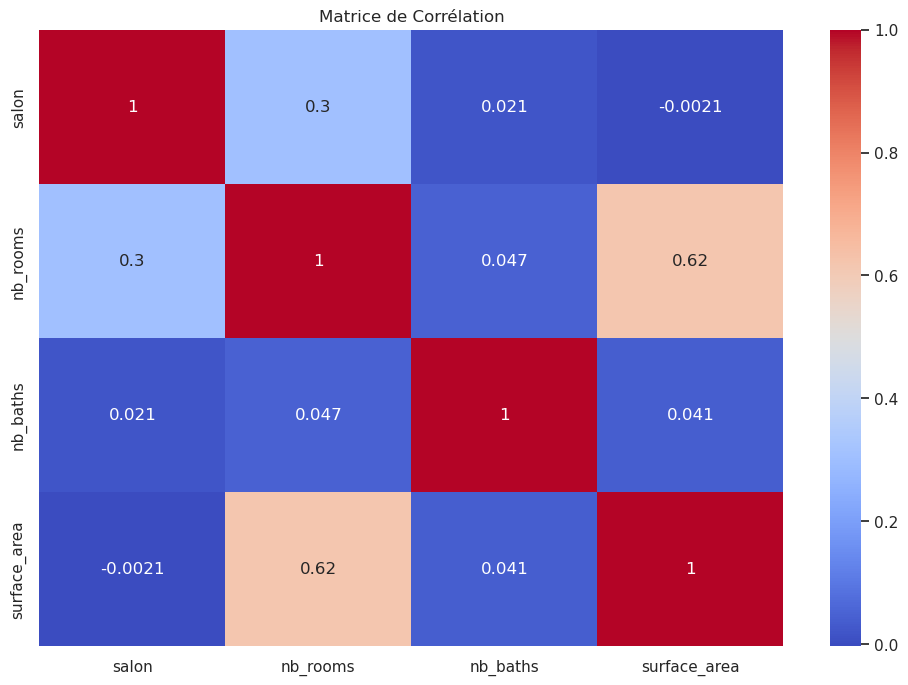

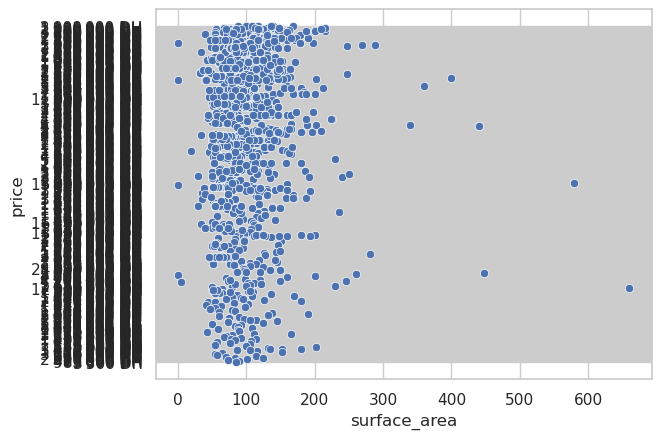

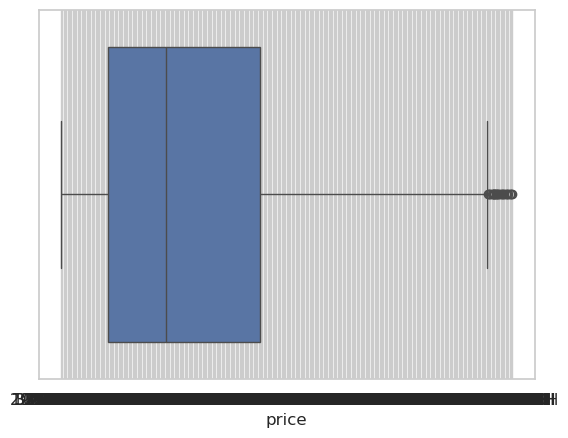

In [16]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(bins=30, figsize=(15,10))
plt.show()
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matrice de Corrélation")
plt.show()
sns.scatterplot(data=df, x='surface_area', y='price')
plt.show()
sns.boxplot(x=df['price'])
plt.show()